In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# set random seeds
np.random.seed(2)
tf.random.set_seed(2)

In [2]:
# load OU data
OU = pd.read_csv('../Data/NFL_OU_Data_Pre2020.csv')

In [3]:
# use OrdinalEncoder to transform team and opp to numeric value
ord_enc = OrdinalEncoder()
OU['team_code'] = ord_enc.fit_transform(OU[['team']])
OU.team_code = OU.team_code.astype(int)
OU['opp_code'] = ord_enc.fit_transform(OU[['opp']])
OU.opp_code = OU.opp_code.astype(int)
Codes = OU[['team', 'team_code', 'opp', 'opp_code']]

In [4]:
# drop 'Team' and 'Opp' since they are now encoded
OU.drop(['team', 'opp'], axis = 1, inplace = True)
OU.head()

,season,week,game,day,time,tm_off_bye,opp_off_bye,tm_btwn_gms,opp_btwn_gms,h_or_a,...,opp_winning_streak,opp_not_cover_streak,opp_cover_streak,opp_under_streak,opp_over_streak,spread,over/under,ou_result,team_code,opp_code
0,2010,2,2,0,0,0,0,7,7,1,...,1.0,0.0,1.0,1.0,0.0,13.0,43.0,0,3,11
1,2010,3,3,0,0,0,0,7,7,1,...,0.0,1.0,0.0,0.0,2.0,14.5,43.0,1,3,21
2,2010,4,4,0,0,0,0,7,7,0,...,2.0,0.0,2.0,0.0,2.0,6.0,37.0,1,3,24
3,2010,5,5,0,0,0,0,7,7,0,...,1.0,0.0,1.0,0.0,1.0,-2.5,41.5,1,3,14
4,2010,7,6,0,0,1,0,14,7,1,...,0.0,0.0,0.0,1.0,0.0,12.5,40.0,1,3,2


In [5]:
# new dataframe
ABC = OU[['opp_def_rushy_avg', 'tm_def_score_avg', 'tm_def_passy_avg', 'tm_def_rushy_avg', 'opp_def_passy_avg',
          'opp_off_rushy_avg', 'opp_off_score_avg', 'tm_pass_att_avg', 'tm_off_rushy_avg', 'opp_def_score_avg',
          'opp_pass_att_avg', 'opp_def_1std_avg', 'tm_off_score_avg', 'tm_off_passy_avg',
          'opp_sacked_avg', 'tm_sacked_avg', 'tm_def_1std_avg', 'tm_off_1stdwn_avg', 'tm_pass_int_avg',
          'tm_pass_td_avg', 'tm_def_to_avg', 'opp_def_to_avg', 'tm_rush_td_avg', 'spread', 
          'opp_rush_td_avg', 'team_code', 'opp_code', 'opp_winning%', 'over/under', 'ou_result']]

In [6]:
corr = ABC.corr()
corr

,opp_def_rushy_avg,tm_def_score_avg,tm_def_passy_avg,tm_def_rushy_avg,opp_def_passy_avg,opp_off_rushy_avg,opp_off_score_avg,tm_pass_att_avg,tm_off_rushy_avg,opp_def_score_avg,...,tm_def_to_avg,opp_def_to_avg,tm_rush_td_avg,spread,opp_rush_td_avg,team_code,opp_code,opp_winning%,over/under,ou_result
opp_def_rushy_avg,1.000000,-0.025943,0.015681,-0.044002,-0.113589,-0.199471,-0.227192,-0.004541,0.011444,0.420081,...,0.044455,-0.134140,-0.012868,-2.290372e-01,-0.133862,-0.003437,-0.048934,-0.383334,4.743650e-02,-4.531235e-03
tm_def_score_avg,-0.025943,1.000000,0.484686,0.420081,0.023069,0.026340,0.013128,0.336513,-0.199462,0.005976,...,-0.337086,0.001155,-0.095186,2.745580e-01,0.007132,0.015581,0.010909,0.002158,2.125306e-01,-3.907590e-02
tm_def_passy_avg,0.015681,0.484686,1.000000,-0.113589,0.032688,0.022254,0.019349,0.109543,-0.027903,0.023069,...,0.009390,-0.025341,0.116513,3.556196e-02,0.041149,0.049667,0.010380,-0.009789,2.865083e-01,-1.578959e-02
tm_def_rushy_avg,-0.044002,0.420081,-0.113589,1.000000,0.015681,0.011444,0.017319,0.158453,-0.199471,-0.025943,...,-0.134140,0.044455,-0.133862,2.290372e-01,-0.012868,-0.048934,-0.003437,0.020839,4.743650e-02,-4.531235e-03
opp_def_passy_avg,-0.113589,0.023069,0.032688,0.015681,1.000000,-0.027903,0.261932,0.000261,0.022254,0.484686,...,-0.025341,0.009390,0.041149,-3.556196e-02,0.116513,0.010380,0.049667,-0.088787,2.865083e-01,-1.578959e-02
opp_off_rushy_avg,-0.199471,0.026340,0.022254,0.011444,-0.027903,1.000000,0.340688,0.017320,-0.023695,-0.199462,...,0.010716,0.148039,-0.008720,1.742509e-01,0.508607,0.018267,0.052247,0.319432,2.253003e-02,3.136358e-03
opp_off_score_avg,-0.227192,0.013128,0.019349,0.017319,0.261932,0.340688,1.000000,0.024187,0.008103,-0.083622,...,0.001729,0.337723,0.034594,4.093901e-01,0.491446,-0.000505,-0.017223,0.616981,4.322160e-01,-1.022622e-02
tm_pass_att_avg,-0.004541,0.336513,0.109543,0.158453,0.000261,0.017320,0.024187,1.000000,-0.466838,0.004388,...,-0.194327,0.015490,-0.207098,-1.684989e-02,0.045972,-0.101199,-0.009963,0.054172,2.700053e-01,-3.348253e-03
tm_off_rushy_avg,0.011444,-0.199462,-0.027903,-0.199471,0.022254,-0.023695,0.008103,-0.466838,1.000000,0.026340,...,0.148039,0.010716,0.508607,-1.742509e-01,-0.008720,0.052247,0.018267,-0.022050,2.253003e-02,3.136358e-03
opp_def_score_avg,0.420081,0.005976,0.023069,-0.025943,0.484686,-0.199462,-0.083622,0.004388,0.026340,1.000000,...,0.001155,-0.337086,0.007132,-2.745580e-01,-0.095186,0.010909,0.015581,-0.592754,2.125306e-01,-3.907590e-02


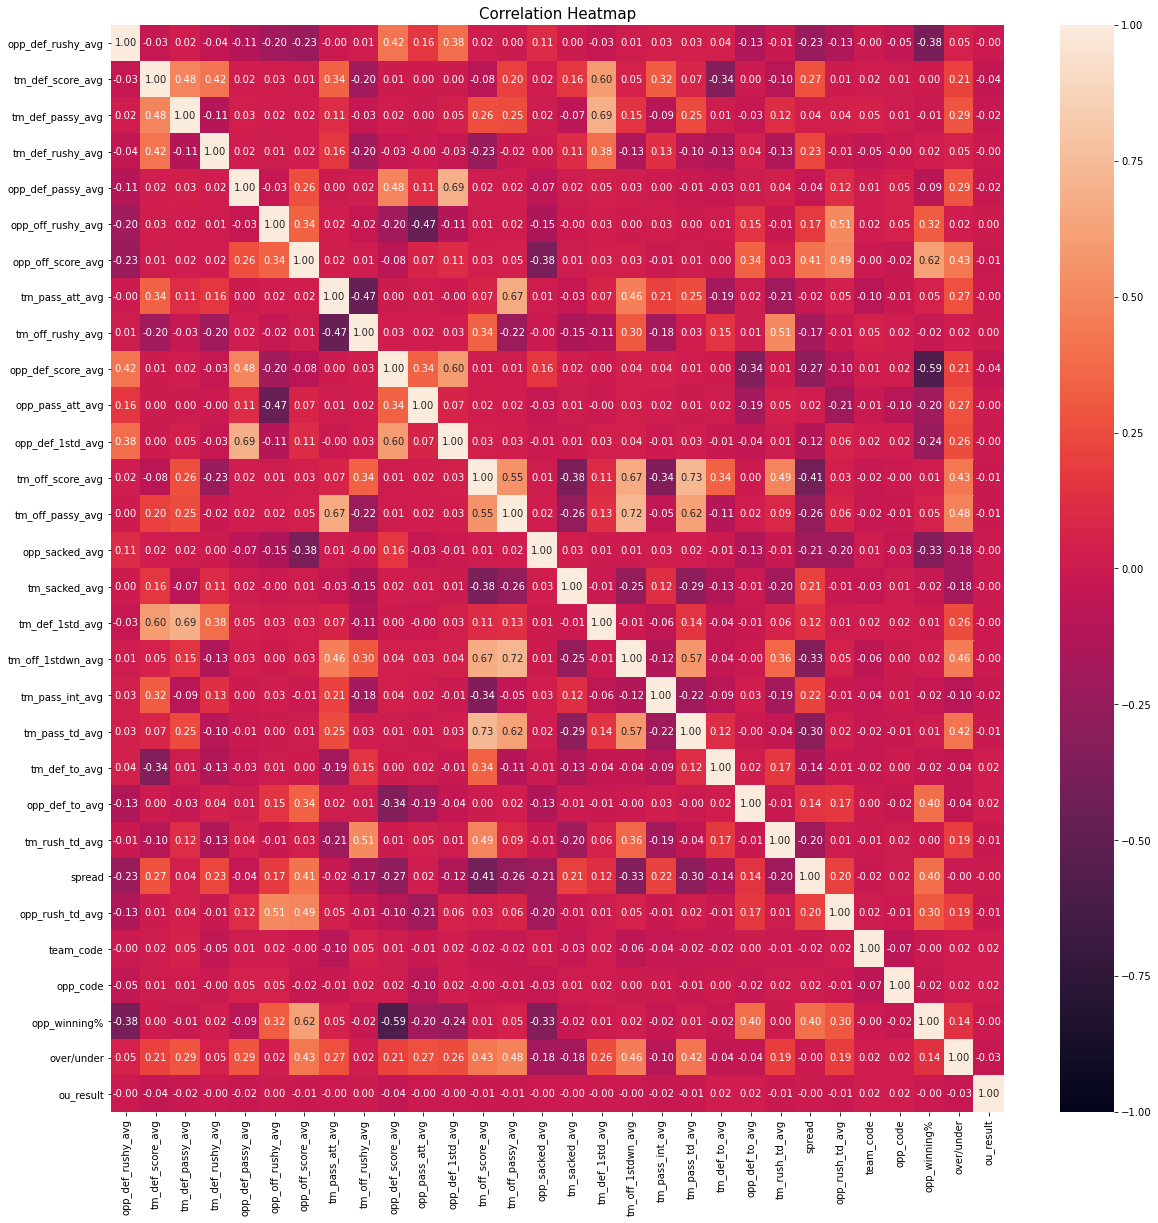

In [7]:
# correlation heatmap of new features
plt.figure(figsize = (20,20))
sns.heatmap(corr, vmin = -1, vmax =1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict = {'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [8]:
# features and target
X = ABC.iloc[:,:-1].values
y = ABC.iloc[:,-1].values

In [9]:
# scale using StandardScaler, then fit_transform
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# number of samples in each set
print('Samples in training set:', X_train.shape[0])
print('Samples in testing set:', X_test.shape[0])

Samples in training set: 3790
Samples in testing set: 948


In [11]:
# define the keras model
ann_ou = Sequential()
ann_ou.add(Dense(32, input_dim = 29, activation = 'relu'))
ann_ou.add(Dropout(0.3))
ann_ou.add(Dense(8, activation = 'relu'))
ann_ou.add(Dropout(0.2))
ann_ou.add(Dense(4, activation = 'relu'))
ann_ou.add(Dense(1, activation = 'sigmoid'))

In [12]:
# compile the keras model
ann_ou.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [13]:
# fit the keras model on the training set
history = ann_ou.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 45, batch_size = 500, verbose = 0)

In [14]:
# evaluate the keras model
_,accuracy = ann_ou.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy * 100))
_,accuracy = ann_ou.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

119/119 [==============================] - 0s 559us/step - loss: 0.6878 - accuracy: 0.5512
Accuracy: 55.12
30/30 [==============================] - 0s 554us/step - loss: 0.6944 - accuracy: 0.5264
Accuracy: 52.64


In [15]:
ann_ou.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                960       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
______________________________________________________

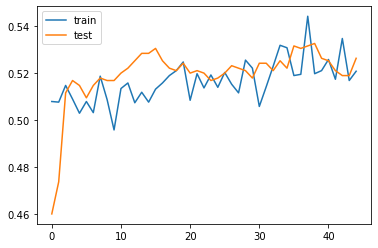

In [16]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

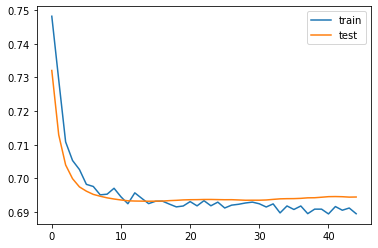

In [17]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [18]:
# save model, weights, architecture
ann_ou.save('..\\Pickles\\ann_ou.h5')